Enter the value of n: 3
Enter row 1 of the matrix: 4 -1 -1
Enter row 2 of the matrix: -2 6 1
Enter row 3 of the matrix: -1 1 7
Enter the result vector: 3 9 -6


<ipython-input-1-d124eb961d19>:32: RuntimeWarning: divide by zero encountered in double_scalars
  re = err / sum1


Iteration 0: x1=0.750000 x2=1.500000 x3=-0.857143
approx. error=1.3928571428571428 rel. approx. error=inf time=0.423431396484375ms

Iteration 1: x1=0.910714 x2=1.892857 x3=-0.964286
approx. error=0.4464285714285716 rel. approx. error=0.32051282051282065 time=3.8175582885742188ms

Iteration 2: x1=0.982143 x2=1.964286 x3=-0.997449
approx. error=0.10969387755101989 rel. approx. error=0.05963938973647683 time=4.121303558349609ms

Iteration 3: x1=0.991709 x2=1.993622 x3=-0.997449
approx. error=0.0389030612244905 rel. approx. error=0.019960732984293558 time=4.277467727661133ms

Iteration 4: x1=0.999043 x2=1.996811 x3=-1.000273
approx. error=0.007698615160349531 rel. approx. error=0.0038727714377375885 time=4.418611526489258ms

Iteration 5: x1=0.999134 x2=1.999727 x3=-0.999681
approx. error=0.0035987609329448667 rel. approx. error=0.0018033647590569022 time=4.572629928588867ms

Iteration 6: x1=1.000011 x2=1.999658 x3=-1.000085
approx. error=0.00040510464389842404 rel. approx. error=0.00020263

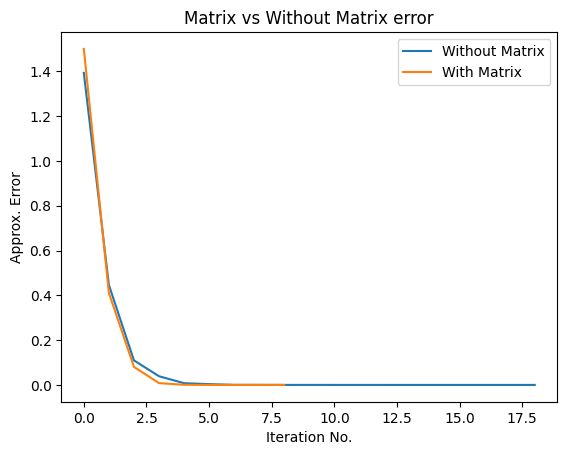

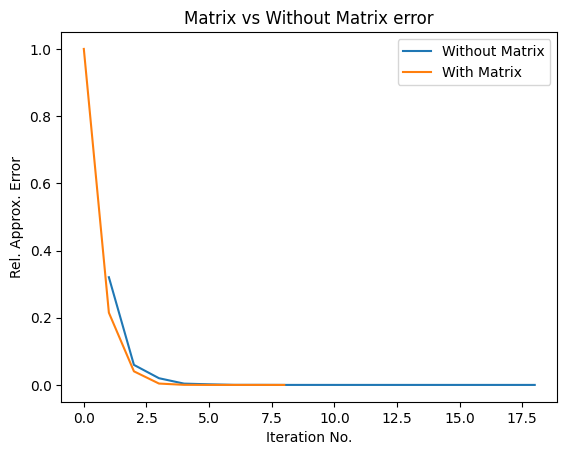

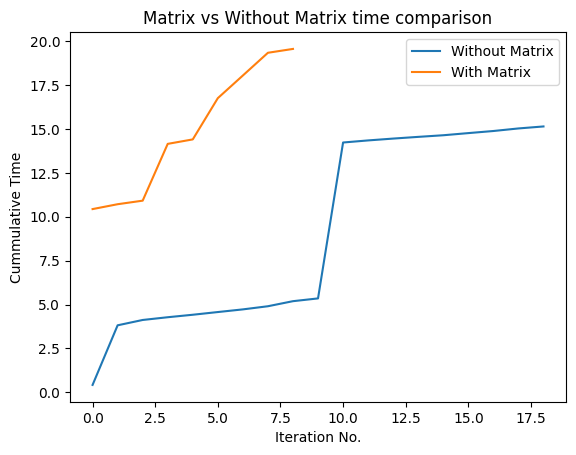

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

it = []
it2 = []
error = []
rel_err = []
error2 = []
rel_err2 = []
time_count = []
time_count2 = []


def linear_iteration(n, matrix, result, tolerance=1e-8):
    x0 = np.zeros(n)
    x1 = np.zeros(n)

    start_timer = time.time()

    iteration = 0
    while True:
        for i in range(n):
            total_sum = np.dot(matrix[i], x1) - matrix[i][i] * x1[i]
            x0[i] = (result[i] - total_sum) / matrix[i][i]

        sum0 = np.sum(x0)
        sum1 = np.sum(x1)

        err = abs(sum1 - sum0)

        re = err / sum1

        current_time = (time.time() - start_timer) * 1000

        error.append(err)
        rel_err.append(re)
        time_count.append(current_time)
        it.append(iteration)

        print(
            f"Iteration {iteration}:",
            " ".join(f"x{i+1}={x:.6f}" for i, x in enumerate(x0)),
        )

        print(f"approx. error={err} rel. approx. error={re} time={current_time}ms\n")

        if re < tolerance:
            break

        x1 = x0.copy()
        iteration += 1


def compute_x(D, L, U, Di, x):
    ans = -np.dot(L + U, x)
    ans += result
    ans = np.dot(Di, ans)

    return ans


def matrix_iteration(n, matrix, result, tolerance=1e-8):
    x0 = np.zeros(n)

    Diagonal = np.diag(matrix)
    Lower = np.tril(matrix, k=-1)
    Upper = np.triu(matrix, k=1)
    D_inverse = np.diag(1.0 / Diagonal)

    start_timer = time.time()

    iteration = 0
    while True:
        x1 = np.zeros(n)
        for i in range(n):
            total_sum = np.dot(Lower[i], x1) + np.dot(Upper[i], x0)
            x1[i] = (result[i] - total_sum) / Diagonal[i]

        sum0 = np.sum(x0)
        sum1 = np.sum(x1)

        err = abs(sum1 - sum0)

        re = err / sum1

        current_time = (time.time() - start_timer) * 1000

        error2.append(err)
        rel_err2.append(re)
        time_count2.append(current_time)
        it2.append(iteration)

        print(
            f"Iteration {iteration}:",
            " ".join(f"x{i+1}={x:.6f}" for i, x in enumerate(x0)),
        )
        print(f"approx. error={err} rel. approx. error={re} time={current_time}ms\n")

        if re < tolerance:
            break

        x0 = x1.copy()
        iteration += 1


if __name__ == "__main__":
    n = int(input("Enter the value of n: "))

    matrix = []
    for i in range(n):
        row = list(map(int, input(f"Enter row {i+1} of the matrix: ").split()))
        matrix.append(row)

    result = list(map(int, input("Enter the result vector: ").split()))

    linear_iteration(n, matrix, result)
    matrix_iteration(n, matrix, result)

    plt.plot(it, error, label="Without Matrix")
    plt.plot(it2, error2, label="With Matrix")
    plt.xlabel("Iteration No.")
    plt.ylabel("Approx. Error")
    plt.title("Matrix vs Without Matrix error")
    plt.legend()
    plt.show()

    plt.plot(it, rel_err, label="Without Matrix")
    plt.plot(it2, rel_err2, label="With Matrix")
    plt.xlabel("Iteration No.")
    plt.ylabel("Rel. Approx. Error")
    plt.title("Matrix vs Without Matrix error")
    plt.legend()
    plt.show()

    plt.plot(it, time_count, label="Without Matrix")
    plt.plot(it2, time_count2, label="With Matrix")
    plt.xlabel("Iteration No.")
    plt.ylabel("Cummulative Time")
    plt.title("Matrix vs Without Matrix time comparison")
    plt.legend()
    plt.show()